In [526]:
import pandas as pd
import numpy as np

In [527]:
income_data = pd.read_csv(
    '/Users/nirmalsinhrathod/python-proj/learning-python/numpy/city_income.csv')
# print(income_data.head(3))
print(income_data.info())
print(income_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0     Name  34 non-null     object
 1   Income  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 676.0+ bytes
None
             Income
count  3.400000e+01
mean   3.411765e+05
std    1.706722e+06
min    2.700000e+04
25%    3.900000e+04
50%    4.850000e+04
75%    5.875000e+04
max    1.000000e+07


In [528]:
# calculate the mean income for a city
import math
mean_income = income_data["Income"].mean()  # avg income
print(f"The mean income for the city is {mean_income}")
# calculate the median income for a city
median_income = income_data["Income"].median()  # median income or middle value
print(f"The median income for the city is {median_income}")
# calculate the mode income for a city
# mode - maximum frequency of the values
mode_income = income_data["Income"].mode()
print(f"The mode income for the city is {mode_income[0]}")

income_data["Income"].max()
income_data["Income"].min()
print("Standard varience", income_data["Income"].std())  # standard deviation
# formula to calculate std - sqrt(sum((x-mean)^2)/(n-1))
# x - represents the individual income value

n = income_data["Income"].count()
global income_std
income_std = 0
for x in income_data["Income"]:
    income_std += (x - mean_income) ** 2
income_std = math.sqrt(income_std / (n-1))
print(f"standard deviation of income for the city is {income_std} \n")

The mean income for the city is 341176.4705882353
The median income for the city is 48500.0
The mode income for the city is 39000
Standard varience 1706721.9238909998
standard deviation of income for the city is 1706721.9238909998 



In [529]:
print("quantfile 25%", income_data["Income"].quantile(0.25))
# quanile value - 0<=quantile<=1
# 25% quantile - 25% of the my data points are less than or equal to this value
print("quantile 50%", income_data["Income"].quantile(0.50))

print("quantile 99.999%", income_data["Income"].quantile(
    0.99999999, interpolation="linear"))

quantfile 25% 39000.0
quantile 50% 48500.0
quantile 99.999% 9999996.724749941


In [530]:
# outlier - a data point that is significantly different from other data points
# remove the outliers
# i want to remove the outliers from the income data 80%

income_data_without_outliers = income_data[income_data["Income"]
                                           < income_data["Income"].quantile(0.8)]
print(f"The number of outliers removed is {
      income_data.shape[0] - income_data_without_outliers.shape[0]}")
print(income_data_without_outliers)

The number of outliers removed is 7
       Name  Income
0     Alice   55000
2   Charlie   35000
3     David   48000
5     Alice   29000
7   Charlie   40000
8     David   52000
9       Eve   28000
11      Bob   31000
12  Charlie   58000
13    David   42000
14      Eve   49000
15    Alice   27000
17  Charlie   45000
18    David   53000
19      Eve   39000
20    Alice   57000
21      Bob   41000
22  Charlie   52000
23    David   47000
24      Eve   60000
25    Alice   34000
26      Bob   59000
27  Charlie   46000
28    David   38000
29      Eve   51000
31      Bob   33000
32  Charlie   39000


In [531]:
# do data cleaning
income_data["Income"][3] = np.nan
# print(income_data)
income_data_without_nan = income_data.dropna()
print(income_data_without_nan[:1])
print("----")

# we can aslo drop the duplicate items
income_data_without_duplicates = income_data.drop_duplicates()
print(income_data_without_duplicates[:12])

    Name   Income
0  Alice  55000.0
----
       Name   Income
0     Alice  55000.0
1       Bob  72000.0
2   Charlie  35000.0
3     David      NaN
4       Eve  62000.0
5     Alice  29000.0
6       Bob  75000.0
7   Charlie  40000.0
8     David  52000.0
9       Eve  28000.0
10    Alice  63000.0
11      Bob  31000.0


/var/folders/bh/4rclxbnx2016p9vvx1sx17th0000gn/T/ipykernel_7239/2267404239.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  income_data["Income"][3]=np.nan
/var/folders/bh/4rclxbnx2016p9vvx1sx17th0000gn/T/ipykernel_7239/2267404239.py:2: S

In [532]:
# filling Nan value with median
print(income_data[:5])
print("median income was", median_income)
new_income_data = income_data.fillna(median_income)
print("-----    --- ")
print(new_income_data[:5])

      Name   Income
0    Alice  55000.0
1      Bob  72000.0
2  Charlie  35000.0
3    David      NaN
4      Eve  62000.0
median income was 48500.0
-----    --- 
      Name   Income
0    Alice  55000.0
1      Bob  72000.0
2  Charlie  35000.0
3    David  48500.0
4      Eve  62000.0


In [533]:
ny_data = pd.read_csv("./../new-york-city-airbnb-open-data.csv")
print(ny_data.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [534]:
# all data that have nan values
# print(ny_data.isnull().sum())

# remove all NaN values
ny_data_without_nan = ny_data.dropna()
print("NY data after removing NaN values:\n", ny_data_without_nan["price"][:3])

# calculate the average price of NY data
print("Average price for a room in  NY data:",
      ny_data_without_nan["price"].mean())

# calculate the median price of NY data
print("Median price for a room in  NY data:",
      ny_data_without_nan["price"].median())
print(ny_data[ny_data["number_of_reviews"] > 600])

NY data after removing NaN values:
 0    149
1    225
3     89
Name: price, dtype: int64
Average price for a room in  NY data: 142.33252621004095
Median price for a room in  NY data: 101.0
            id                        name   host_id host_name  \
2031    903972  Great Bedroom in Manhattan   4734398        Jj   
11759  9145202     Room near JFK Queen Bed  47621202      Dona   

      neighbourhood_group neighbourhood  latitude  longitude     room_type  \
2031            Manhattan        Harlem  40.82085  -73.94025  Private room   
11759              Queens       Jamaica  40.66730  -73.76831  Private room   

       price  minimum_nights  number_of_reviews last_review  \
2031      49               1                607  2019-06-21   
11759     47               1                629  2019-07-05   

       reviews_per_month  calculated_host_listings_count  availability_365  
2031                7.75                               3               293  
11759              14.58         

In [535]:
# standard deviation of price
ny_room_price_std = ny_data_without_nan["price"].std()
print("Standard deviation of price for NY rooms:", ny_room_price_std)

# calculate using formaula
ny_room_price_mean = ny_data_without_nan["price"].mean()
ny_data_size = ny_data_without_nan["price"].count()
diff_bet_currentPrice_mean = 0
for price in ny_data_without_nan["price"]:
    diff_bet_currentPrice_mean += (price - ny_room_price_mean) ** 2
ny_room_price_std_manual = math.sqrt(
    float(diff_bet_currentPrice_mean) / (ny_data_size-1))
print("Standard deviation of price for NY rooms calculated manually:",
      ny_room_price_std_manual)

Standard deviation of price for NY rooms: 196.9947559183469
Standard deviation of price for NY rooms calculated manually: 196.99475591833985


<Axes: xlabel='price', ylabel='availability_365'>

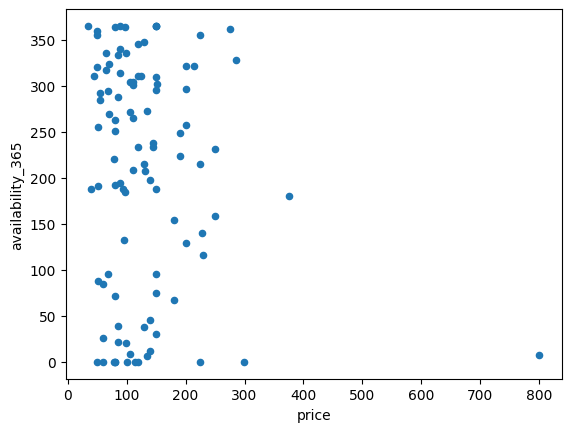

In [538]:
x = ny_data["availability_365"].axes
ny_data[:100].plot.scatter(y="availability_365", x="price")